- ¿Existe un valor numerico de cuantas lesiones previas hace que el jugador sea mucho mas propenso a lesionarse a futuro?

In [3]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,KFold
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Datos_limpio.csv")
df.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,False,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,False,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,True,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,False,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,True,31.773932


In [5]:
###Dividimos los datos x e y 
X = df["Previous_Injury_Count"]
y = df["Injury_Next_Season"]
df_x_y = df[["Previous_Injury_Count", "Injury_Next_Season"]]
X.shape, y.shape

((800,), (800,))

In [6]:
X=np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
X.shape, y.shape

((800, 1), (800, 1))

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier() 
knn.fit(x_train, y_train)

C:\Users\semab\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [9]:
knn.score(x_train, y_train)

0.5816666666666667

In [10]:
knn_2 = KNeighborsClassifier() 
X_train_esc =StandardScaler().fit_transform(x_train)
X_test_esc =StandardScaler().fit_transform(x_test)
knn_2.fit(X_train_esc, y_train)

C:\Users\semab\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [11]:
knn_2.score(X_train_esc, y_train)

0.5816666666666667

In [12]:
from sklearn.pipeline import make_pipeline

In [13]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier()
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipeline.fit(X_train_esc, y_train)

,steps,"[('standardscaler', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [14]:
pipeline.score(X_train_esc, y_train)

0.66

In [15]:

kf = KFold(n_splits=6, shuffle=True , random_state=42)
params= {"n_neighbors":np.arange(2,20)}
grid_search_knn = GridSearchCV(KNeighborsClassifier(),params, cv = kf )
grid_search_knn.fit(X_train_esc, y_train)


C:\Users\semab\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\semab\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\semab\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\semab\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': array([ 2, 3...8, 19])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,7


In [16]:
grid_search_knn.best_params_, grid_search_knn.best_score_

({'n_neighbors': 7}, 0.66)

In [17]:
pipeline_2 = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipeline_2.fit(x_train, y_train)

,steps,"[('standardscaler', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [18]:
pipeline_2.score(x_train, y_train)

0.66

In [19]:
pipeline_2.score(X_test_esc, y_test)

0.55

In [20]:
Knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_esc, y_train)

C:\Users\semab\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
knn.score(X_train_esc, y_train)

0.5816666666666667

In [22]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier() 
rf.fit(X_train_esc, y_train)

C:\Users\semab\anaconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
rf.score(X_train_esc, y_train)

0.66

In [24]:
rf.score(X_test_esc, y_test)

0.66

In [25]:
df_x_y.groupby("Previous_Injury_Count")["Injury_Next_Season"].size()

Previous_Injury_Count
0    185
1    259
2    187
3    106
4     43
5     17
6      1
7      1
8      1
Name: Injury_Next_Season, dtype: int64

In [26]:
df_x_y

,Previous_Injury_Count,Injury_Next_Season
0,1,False
1,2,False
2,2,True
3,1,False
4,2,True
...,...,...
795,1,True
796,2,True
797,3,True
798,1,False


<Axes: xlabel='Previous_Injury_Count', ylabel='count'>

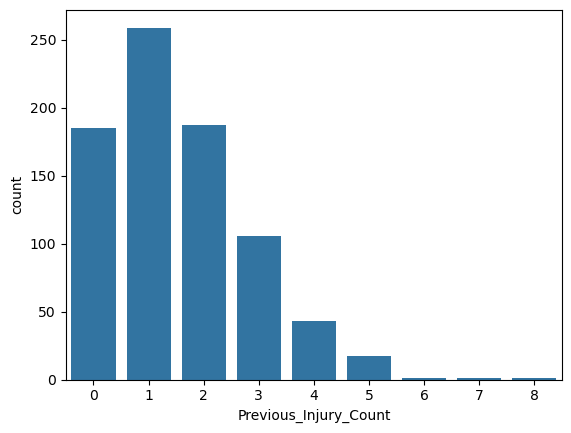

In [27]:
sns.countplot(data=df_x_y, x = "Previous_Injury_Count")#muestra la cantidad de la cantidad de lesiones

<Axes: xlabel='Previous_Injury_Count', ylabel='Count'>

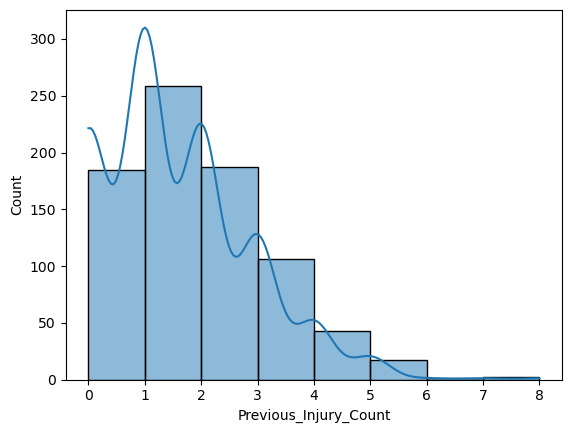

In [28]:
sns.histplot(data=df_x_y, x = "Previous_Injury_Count", kde = True, bins= 8)#nos muestra como esta distribuida la cantidad de lesiones 

<Axes: xlabel='Previous_Injury_Count', ylabel='Injury_Next_Season'>

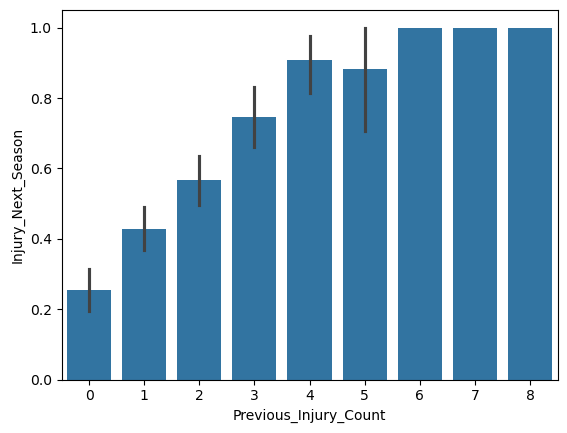

In [29]:
sns.barplot(data=df_x_y, x = "Previous_Injury_Count", y ="Injury_Next_Season") ##usa el promedio 


<Axes: xlabel='Injury_Next_Season', ylabel='count'>

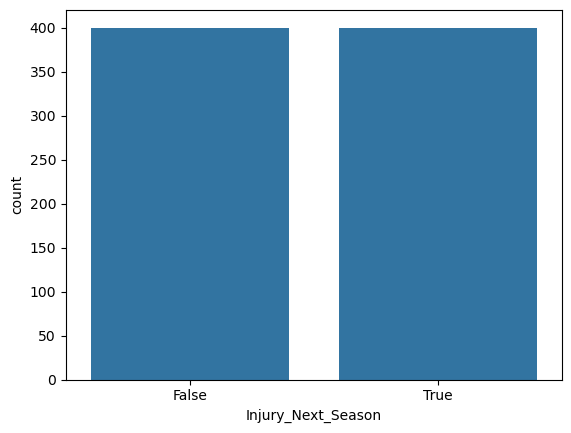

In [30]:
sns.countplot(data=df_x_y, x = "Injury_Next_Season")#Como observamos hay la misma cantidad de personas lesionadas y no leasionadas en la siguiente temporada

In [70]:
df_x_y.Injury_Next_Season = df_x_y.Injury_Next_Season.astype("category")
df_x_y.dtypes

C:\Users\semab\AppData\Local\Temp\ipykernel_3520\2150594871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_y.Injury_Next_Season = df_x_y.Injury_Next_Season.astype("category")


Previous_Injury_Count       int64
Injury_Next_Season       category
dtype: object

In [76]:
df_x_y.groupby("Injury_Next_Season")["Previous_Injury_Count"].count()

C:\Users\semab\AppData\Local\Temp\ipykernel_3520\2638598214.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_x_y.groupby("Injury_Next_Season")["Previous_Injury_Count"].count()


Injury_Next_Season
False    400
True     400
Name: Previous_Injury_Count, dtype: int64

In [138]:
df_x_y.groupby("Injury_Next_Season")["Previous_Injury_Count"].value_counts()

C:\Users\semab\AppData\Local\Temp\ipykernel_3520\4035171134.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_x_y.groupby("Injury_Next_Season")["Previous_Injury_Count"].value_counts()


Injury_Next_Season  Previous_Injury_Count
False               1                        148
                    0                        138
                    2                         81
                    3                         27
                    4                          4
                    5                          2
                    6                          0
                    7                          0
                    8                          0
True                1                        111
                    2                        106
                    3                         79
                    0                         47
                    4                         39
                    5                         15
                    6                          1
                    7                          1
                    8                          1
Name: count, dtype: int64

C:\Users\semab\AppData\Local\Temp\ipykernel_3520\3894575099.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_x_y.groupby("Injury_Next_Season")["Previous_Injury_Count"].value_counts().plot(kind = "bar")


Text(0, 0.5, 'Cantidad de personas')

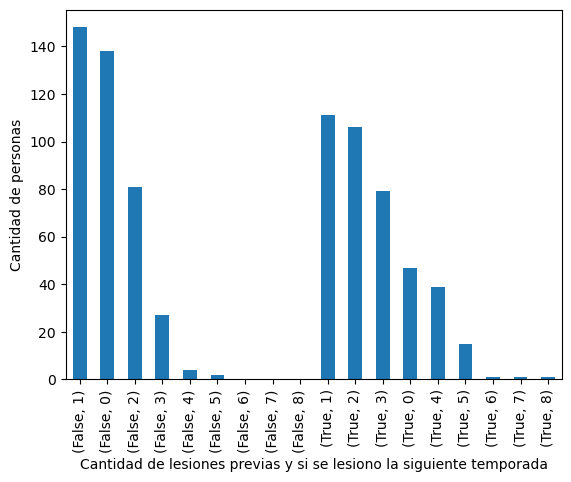

In [144]:
df_x_y.groupby("Injury_Next_Season")["Previous_Injury_Count"].value_counts().plot(kind = "bar")
plt.xlabel("Cantidad de lesiones previas y si se lesiono la siguiente temporada")
plt.ylabel("Cantidad de personas")



In [221]:
df_x_y.groupby("Injury_Next_Season")["Previous_Injury_Count"].value_counts().to_frame().sort_index()

C:\Users\semab\AppData\Local\Temp\ipykernel_3520\1072484073.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_x_y.groupby("Injury_Next_Season")["Previous_Injury_Count"].value_counts().to_frame().sort_index()


count
Injury_Next_Season Previous_Injury_Count       
False              0                        138
                   1                        148
                   2                         81
                   3                         27
                   4                          4
                   5                          2
                   6                          0
                   7                          0
                   8                          0
True               0                         47
                   1                        111
                   2                        106
                   3                         79
                   4                         39
                   5                         15
                   6                          1
                   7                          1
                   8                          1

<Axes: xlabel='Previous_Injury_Count,Injury_Next_Season'>

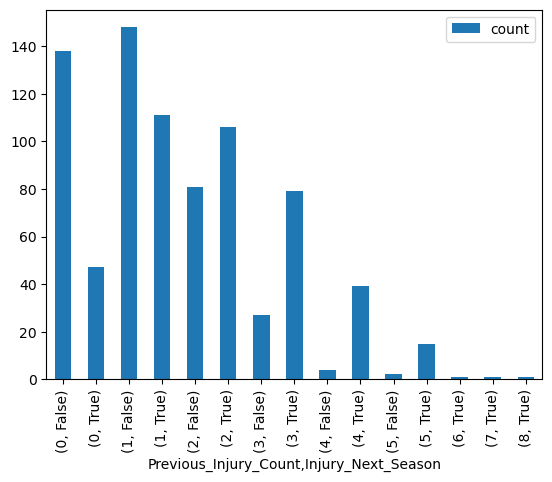

In [210]:
df_x_y.value_counts().to_frame().sort_index().plot(kind = "bar")

In [225]:
df_x_y.value_counts().to_frame().sort_index()

count
Previous_Injury_Count Injury_Next_Season       
0                     False                 138
                      True                   47
1                     False                 148
                      True                  111
2                     False                  81
                      True                  106
3                     False                  27
                      True                   79
4                     False                   4
                      True                   39
5                     False                   2
                      True                   15
6                     True                    1
7                     True                    1
8                     True                    1

## SI OBSERVAMOS EN LOS QUE TUVIERO N3 LESIONES EN EL PASADO SON MUCHO MAS PROPENSO A LESIONEARSE, LA PROBABILIDAD DE LESIONES SE DISPARA  EN LAS 3 Y 4 LESIONES

In [233]:
#https://www.statology.org/pandas-unstack/, para tener un df ordenado deespues de que se generara un multiindice despues de agrupar
analisis  = df_x_y.value_counts().to_frame().sort_index().unstack() # lo que hace es manejar el multiindice que genera el groupby con el value counts
analisis 

count       
Injury_Next_Season     False   True
Previous_Injury_Count              
0                      138.0   47.0
1                      148.0  111.0
2                       81.0  106.0
3                       27.0   79.0
4                        4.0   39.0
5                        2.0   15.0
6                        NaN    1.0
7                        NaN    1.0
8                        NaN    1.0

In [241]:
analisis = analisis.fillna(0)
analisis


count       
Injury_Next_Season     False   True
Previous_Injury_Count              
0                      138.0   47.0
1                      148.0  111.0
2                       81.0  106.0
3                       27.0   79.0
4                        4.0   39.0
5                        2.0   15.0
6                        0.0    1.0
7                        0.0    1.0
8                        0.0    1.0

In [251]:
analisis.columns

MultiIndex([('count', False),
            ('count',  True)],
           names=[None, 'Injury_Next_Season'])

In [259]:
analisis["Total"] = analisis["count", False] + analisis["count", True]
analisis["%lesionados"] = (analisis["count", True] /analisis["Total"])*100
analisis

count         Total %lesionados
Injury_Next_Season     False   True                   
Previous_Injury_Count                                 
0                      138.0   47.0  185.0   25.405405
1                      148.0  111.0  259.0   42.857143
2                       81.0  106.0  187.0   56.684492
3                       27.0   79.0  106.0   74.528302
4                        4.0   39.0   43.0   90.697674
5                        2.0   15.0   17.0   88.235294
6                        0.0    1.0    1.0  100.000000
7                        0.0    1.0    1.0  100.000000
8                        0.0    1.0    1.0  100.000000

([<matplotlib.patches.Wedge at 0x24542a9b530>,
 [Text(1.0259029258290007, 0.39689190817588627, ''),
  Text(-0.04318580762597861, 1.0991519394604605, ''),
  Text(-1.08362026337404, -0.18912198392882937, ''),
  Text(0.060445140316747706, -1.0983380103647915, ''),
  Text(0.914616544923867, -0.611127299137854, ''),
  Text(1.0850721732557227, -0.1806055891330693, ''),
  Text(1.0991519377546728, -0.04318585104114813, ''),
  Text(1.0996946719644192, -0.025915795435766022, ''),
  Text(1.0999660729810725, -0.008639345495932352, '')])

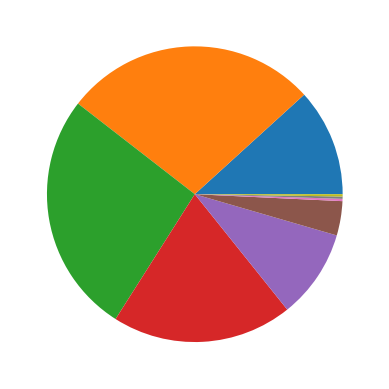

In [279]:
plt.pie(analisis["count", True]) #como se distribuye el total de lesionados